# Hypothesis Testing

In [1]:
# import required libraries
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
# load country_data dataset from csv files into dataframe
country = pd.read_csv("datasets/country_data.csv")

In [3]:
# get the first five rows of the country dataframe
country.head()

,Unnamed: 0,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population,total_road_spending,total_inland_transport_investment
0,9,Austria,2012,542,260518.0,133.0,8408121,8.440000e+08,2.018000e+09
1,10,Austria,2013,546,271888.0,133.0,8451860,9.220000e+08,2.022000e+09
2,11,Austria,2014,547,270913.0,132.0,8507786,1.120000e+09,2.030000e+09
3,12,Austria,2015,546,280060.0,131.0,8584926,1.147000e+09,2.006000e+09
4,13,Austria,2016,550,286990.0,130.0,8700471,1.141000e+09,1.969000e+09


In [4]:
# add non-road spending column
country['non_road_spending'] = country['total_inland_transport_investment'] - country['total_road_spending']

In [5]:
# get the summary statistics for the country dataframe
country.describe()

,Unnamed: 0,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population,total_road_spending,total_inland_transport_investment,non_road_spending
count,150.000000,150.000000,150.000000,1.500000e+02,150.000000,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,174.826667,2015.626667,501.873333,2.740963e+05,112.260000,1.498089e+07,3.138351e+09,3.814688e+09,6.763373e+08
std,98.687749,2.515847,94.155968,4.234211e+05,53.613385,2.157131e+07,4.195269e+09,5.876872e+09,2.746606e+09
min,9.000000,2012.000000,301.000000,3.238000e+03,46.000000,5.248530e+05,1.922000e+08,1.631000e+08,-5.696000e+09
25%,93.250000,2013.000000,431.000000,1.969500e+04,74.000000,2.797863e+06,4.035000e+08,4.106782e+08,-7.404447e+07
50%,171.500000,2015.500000,513.000000,6.879000e+04,104.000000,5.552904e+06,1.037605e+09,1.648500e+09,1.700000e+07
75%,229.750000,2018.000000,563.750000,2.716442e+05,129.000000,9.825102e+06,3.523378e+09,3.915846e+09,4.378088e+08
max,356.000000,2020.000000,682.000000,1.783232e+06,283.000000,6.748553e+07,1.602470e+10,2.373355e+10,1.150134e+10


In [6]:
# get first five rows of country dataframe with new 'non_road_spending' column
country.head()

,Unnamed: 0,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population,total_road_spending,total_inland_transport_investment,non_road_spending
0,9,Austria,2012,542,260518.0,133.0,8408121,8.440000e+08,2.018000e+09,1.174000e+09
1,10,Austria,2013,546,271888.0,133.0,8451860,9.220000e+08,2.022000e+09,1.100000e+09
2,11,Austria,2014,547,270913.0,132.0,8507786,1.120000e+09,2.030000e+09,9.100000e+08
3,12,Austria,2015,546,280060.0,131.0,8584926,1.147000e+09,2.006000e+09,8.590000e+08
4,13,Austria,2016,550,286990.0,130.0,8700471,1.141000e+09,1.969000e+09,8.280000e+08


In [7]:
# create mapping dictionary to assign each country to it's respective European region based on EuroVoc
country_to_region = {
    'Austria': 'western_europe',
    'Bulgaria': 'central_eastern_europe',
    'Switzerland': 'western_europe',
    'Denmark': 'northern_europe',
    'Estonia': 'northern_europe',
    'Finland': 'northern_europe',
    'France': 'western_europe',
    'Croatia': 'central_eastern_europe',
    'Hungary': 'central_eastern_europe',
    'Ireland': 'western_europe',
    'Italy': 'southern_europe',
    'Lithuania': 'northern_europe',
    'Luxembourg': 'western_europe',
    'Latvia': 'northern_europe',
    'Norway': 'northern_europe',
    'Poland': 'central_eastern_europe',
    'Portugal': 'southern_europe',
    'Sweden': 'northern_europe',
    'Slovenia': 'central_eastern_europe',
    'United Kingdom': 'western_europe'
}

In [8]:
# create 'region' column in country dataframe and map newly defined regional country values
country['region'] = country['country'].map(country_to_region)

In [9]:
# get first five rows of updated country dataframe
country.head()

,Unnamed: 0,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population,total_road_spending,total_inland_transport_investment,non_road_spending,region
0,9,Austria,2012,542,260518.0,133.0,8408121,8.440000e+08,2.018000e+09,1.174000e+09,western_europe
1,10,Austria,2013,546,271888.0,133.0,8451860,9.220000e+08,2.022000e+09,1.100000e+09,western_europe
2,11,Austria,2014,547,270913.0,132.0,8507786,1.120000e+09,2.030000e+09,9.100000e+08,western_europe
3,12,Austria,2015,546,280060.0,131.0,8584926,1.147000e+09,2.006000e+09,8.590000e+08,western_europe
4,13,Austria,2016,550,286990.0,130.0,8700471,1.141000e+09,1.969000e+09,8.280000e+08,western_europe


<Axes: >

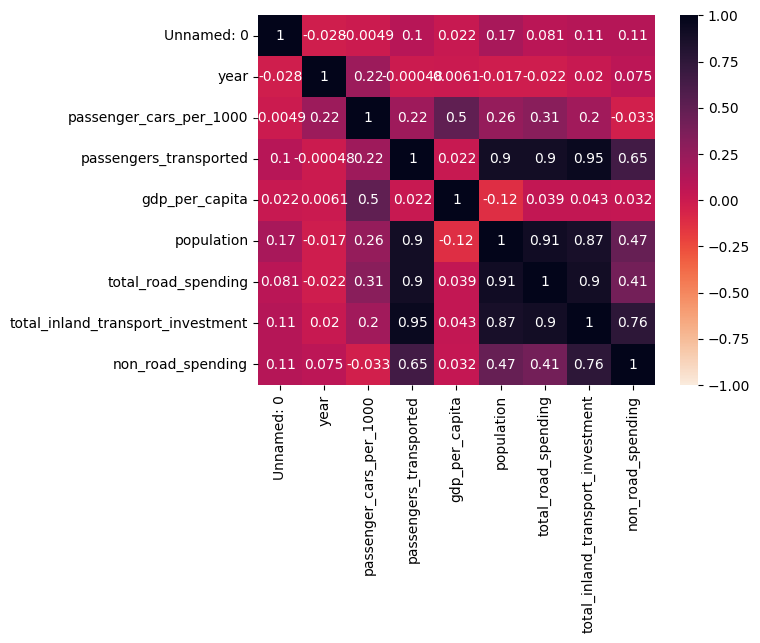

In [28]:
# get correlation heatmap for country variables
sns.heatmap(country.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='rocket_r')

- Assume an alpha of > 0.05 = enough evidence to say there is a significant correlation between two variables
- Assume an alpha of < 0.05 = not enough evidence to say there is a significant correlation between two variables

In [10]:
# calculate pearson correlation coefficient and p_value for 'passengers_transported' and 'total_road_spending'
coefficient, p_value = pearsonr(country['passengers_transported'], country['total_road_spending'])

print(f"Correlation coefficient: {coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.900893611907557
P-value: 1.6410908029695993e-55


Since the correlation coefficient is positive, it indicates that there is a positive linear relationship between the two variables. Additionally, the P-value is less than 0.05, indicating there is a statistically significant correlation between 'total_road_spending' and 'passengers_transported'.

In [11]:
# calculate pearson correlation coefficient and p_value for 'passengers_transported' and 'total_inland_transport_investment'
coefficient, p_value = pearsonr(country['passengers_transported'], country['total_inland_transport_investment'])

print(f"Correlation coefficient: {coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.9462689363081649
P-value: 1.8941612003955495e-74


Since the correlation coefficient is positive, it indicates that there is a positive linear relationship between the two variables. Additionally, the P-value is less than 0.05, indicating there is a statistically significant correlation between 'total_inland_transport_investment' and 'passengers_transported'.

In [12]:
# calculate pearson correlation coefficient and p_value for 'passengers_transported' and 'non_road_spending'
coefficient, p_value = pearsonr(country['passengers_transported'], country['non_road_spending'])

print(f"Correlation coefficient: {coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.6486586696487426
P-value: 2.8300833674546186e-19


Since the correlation coefficient is positive, it indicates that there is a positive linear relationship between the two variables. Additionally, the P-value is less than 0.05, indicating there is a statistically significant correlation between 'non_road_spending' and 'passengers_transported'.

In [32]:
# calculate pearson correlation coefficient and p_value for 'passengers_transported' and 'population'
coefficient, p_value = pearsonr(country['passengers_transported'], country['population'])

print(f"Correlation coefficient: {coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.8997119104948246
P-value: 3.77258455614286e-55


Since the correlation coefficient is positive, it indicates that there is a positive linear relationship between the two variables. Additionally, the P-value is less than 0.05, indicating there is a statistically significant correlation between 'population' and 'passengers_transported'.

In [14]:
# calculate pearson correlation coefficient and p_value for 'passenger_cars_per_1000' and 'total_road_spending'
coefficient, p_value = pearsonr(country['passenger_cars_per_1000'], country['total_road_spending'])

print(f"Correlation coefficient: {coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.3050084862950847
P-value: 0.0001475451099127948


Since the correlation coefficient is positive, it indicates that there is a positive linear relationship between the two variables. Additionally, the P-value is less than 0.05, indicating there is a statistically significant correlation between 'total_road_spending' and 'passenger_cars_per_1000'.

In [15]:
# calculate pearson correlation coefficient and p_value for 'passenger_cars_per_1000' and 'total_inland_transport_investment'
coefficient, p_value = pearsonr(country['passenger_cars_per_1000'], country['total_inland_transport_investment'])

print(f"Correlation coefficient: {coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.2023465512245354
P-value: 0.013019303848693646


Since the correlation coefficient is positive, it indicates that there is a positive linear relationship between the two variables. Additionally, the P-value is less than 0.05, indicating there is a statistically significant correlation between 'total_inland_transport_investment' and 'passenger_cars_per_1000'.

In [17]:
# calculate pearson correlation coefficient and p_value for 'passenger_cars_per_1000' and 'non_road_spending'
coefficient, p_value = pearsonr(country['passenger_cars_per_1000'], country['non_road_spending'])

print(f"Correlation coefficient: {coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient: -0.032923545491491894
P-value: 0.6891825158969822


Since the correlation coefficient is negative, it indicates that there is a negative linear relationship between the two variables. Additionally, the P-value is greater than 0.05, indicating there is not a statistically significant correlation between 'non_road_spending' and 'passenger_cars_per_1000'.

In [33]:
# calculate pearson correlation coefficient and p_value for 'passenger_cars_per_1000' and 'population'
coefficient, p_value = pearsonr(country['passenger_cars_per_1000'], country['population'])

print(f"Correlation coefficient: {coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.2553988062407187
P-value: 0.0016088466319212353


Since the correlation coefficient is positive, it indicates that there is a positive linear relationship between the two variables. Additionally, the P-value is less than 0.05, indicating there is a statistically significant correlation between 'population' and 'passenger_cars_per_1000'.

In [18]:
# calculate pearson correlation coefficient and p_value for 'gdp_per_capita' and 'total_road_spending'
coefficient, p_value = pearsonr(country['gdp_per_capita'], country['total_road_spending'])

print(f"Correlation coefficient: {coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.039371393348320266
P-value: 0.6324005120026722


Since the correlation coefficient is positive, it indicates that there is a positive linear relationship between the two variables. Additionally, the P-value is greater than 0.05, indicating there is not a statistically significant correlation between 'total_road_spending' and 'gdp_per_capita'.

In [19]:
# calculate pearson correlation coefficient and p_value for 'gdp_per_capita' and 'total_inland_transport_investment'
coefficient, p_value = pearsonr(country['gdp_per_capita'], country['total_inland_transport_investment'])

print(f"Correlation coefficient: {coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.04322834543981994
P-value: 0.5994069112592917


Since the correlation coefficient is positive, it indicates that there is a positive linear relationship between the two variables. Additionally, the P-value is greater than 0.05, indicating there is not a statistically significant correlation between 'total_inaldn_transport_investment' and 'gdp_per_capita'.

In [20]:
# calculate pearson correlation coefficient and p_value for 'gdp_per_capita' and 'non_road_spending'
coefficient, p_value = pearsonr(country['gdp_per_capita'], country['non_road_spending'])

print(f"Correlation coefficient: {coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.032357695536174874
P-value: 0.6942552565108163


Since the correlation coefficient is positive, it indicates that there is a positive linear relationship between the two variables. Additionally, the P-value is greater than 0.05, indicating there is not a statistically significant correlation between 'non_road_spending' and 'gdp_per_capita'.

In [29]:
# calculate pearson correlation coefficient and p_value for 'gdp_per_capita' and 'population'
coefficient, p_value = pearsonr(country['gdp_per_capita'], country['population'])

print(f"Correlation coefficient: {coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient: -0.12339923825825273
P-value: 0.13246839371895835


Since the correlation coefficient is negative, it indicates that there is a negative linear relationship between the two variables. Additionally, the P-value is greater than 0.05, indicating there is not a statistically significant correlation between 'population' and 'gdp_per_capita'.

In [30]:
# calculate pearson correlation coefficient and p_value for 'gdp_per_capita' and 'population'
coefficient, p_value = pearsonr(country['gdp_per_capita'], country['passenger_cars_per_1000'])

print(f"Correlation coefficient: {coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.5032658694376598
P-value: 5.247417071501173e-11


Since the correlation coefficient is positive, it indicates that there is a positive linear relationship between the two variables. Additionally, the P-value is less than 0.05, indicating there is a statistically significant correlation between 'passenger_cars_per_1000' and 'gdp_per_capita'.

In [31]:
# calculate pearson correlation coefficient and p_value for 'gdp_per_capita' and 'passengers_transported'
coefficient, p_value = pearsonr(country['gdp_per_capita'], country['passengers_transported'])

print(f"Correlation coefficient: {coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.022017473758203357
P-value: 0.7891346456501479


Since the correlation coefficient is positive, it indicates that there is a positive linear relationship between the two variables. Additionally, the P-value is greater than 0.05, indicating there is not a statistically significant correlation between 'passengers_transported' and 'gdp_per_capita'.

### Summary:

- **passengers_transported and total_road_spending:** positive linear relationship; there IS a significant correlation (p-value < 0.05)
- **passengers_transported and total_inland_transport_investment:** positive linear relationship; there IS a significant correlation (p-value < 0.05)
- **passengers_transported and non_road_spending:** positive linear relationship; there IS a significant correlation (p-value < 0.05)
- **passengers_transported and population:** positive linear relationship; there IS a significant correlation (p-value < 0.05)
- **passenger_cars_per_1000 and total_road_spending:** positive linear relationship; there IS a significant correlation (p-value < 0.05)
- **passenger_cars_per_1000 and total_inland_transport_investment:** positive linear relationship; there IS a significant correlation (p-value < 0.05)
- **passenger_cars_per_1000 and non_road_spending:** negative linear relationship; no significant correlation (p-value > 0.05)
- **passenger_cars_per_1000 and population:** positive linear relationship; there IS a significant correlation (p-value < 0.05)
- **gdp_per_capita and total_road_spending:** positive linear relationship; no significant correlation (p-value > 0.05)
- **gdp_per_capita and total_inland_transport_investment:** positive linear relationship; no significant correlation (p-value > 0.05)
- **gdp_per_capita and non_road_spending:** positive linear relationship; no significant correlation (p-value > 0.05)
- **gdp_per_capita and population:** negative linear relationshop; no significant correlation (p-value > 0.05)
- **gdp_per_capita and passenger_cars_per_1000:** positive linear relationship; there IS a significant correlation (p-value < 0.05)
- **gdp_per_capita and passengers_transported:** positive linear relationship; no significant correlation (p-value > 0.05)